# Working environmment

In [2]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

from joblib import dump, load
import dashboard
import plotly.express as px

# Options
pd.set_option('display.max_columns', 200)
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df_decision = pd.read_csv('../02_classification/submission.csv')
df_decision.head()

,SK_ID_CURR,TARGET
0,100001,0.026279
1,100005,0.179404
2,100013,0.018879
3,100028,0.034658
4,100038,0.130465


In [4]:
# Decisions
thres = 0.3
df_decision['LOAN'] = df_decision['TARGET']<thres
df_decision['option'] = df_decision['SK_ID_CURR'].apply(lambda x : {'label': str(x), 'value':str(x)})

df_decision.head()

,SK_ID_CURR,TARGET,LOAN,option
0,100001,0.026279,True,"{'label': '100001', 'value': '100001'}"
1,100005,0.179404,True,"{'label': '100005', 'value': '100005'}"
2,100013,0.018879,True,"{'label': '100013', 'value': '100013'}"
3,100028,0.034658,True,"{'label': '100028', 'value': '100028'}"
4,100038,0.130465,True,"{'label': '100038', 'value': '100038'}"


In [54]:
s_ = np.histogram(df_decision['TARGET'], bins=np.arange(0,1,0.01))[0]
heights = s_/s_.sum()
heights[int(cust_target//0.01)]

0.1484490398818316

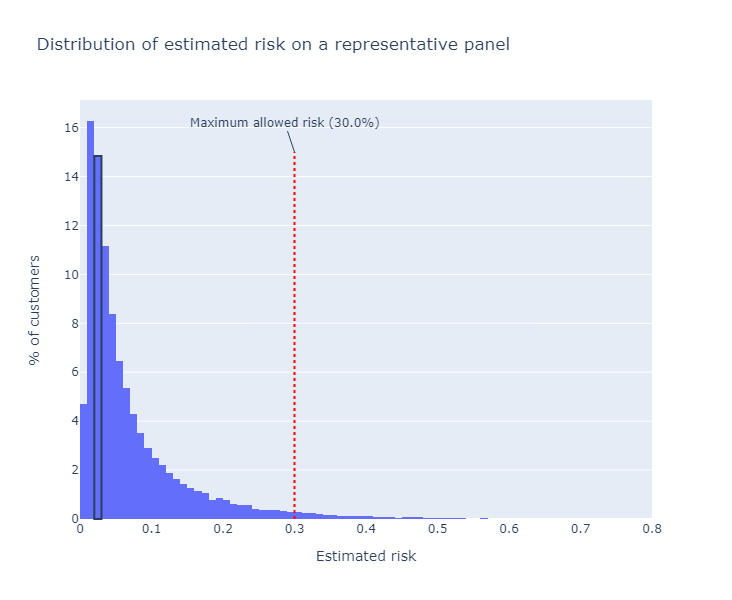

In [58]:
# histogram
customer_id=100001
cust_target = df_decision[df_decision['SK_ID_CURR']==customer_id]['TARGET'].values[0]
heights = np.histogram(df_decision['TARGET'], bins=np.arange(0,1,0.01))[0]
heights = heights/heights.sum()
cust_height = 100*heights[int(cust_target//0.01)]

fig = px.histogram(df_decision, x='TARGET', nbins=100, histnorm='percent',
                  title='Distribution of estimated risk on a representative panel',
                  labels={'TARGET':'Estimated risk'})

fig.update_layout(yaxis_title='% of customers')
fig.add_shape(type='line', x0=thres, x1=thres, y0=0, y1=15, line_color='red', line_dash='dot')
fig.add_annotation(text='Maximum allowed risk ({:.1%})'.format(thres), x=thres, y=15)

fig.add_shape(type='rect',x0=cust_target//0.01/100, 
              x1=cust_target//0.01/100 + 0.01, 
              y0=0, y1=cust_height)

fig.show()

In [67]:
dashboard.generate(thres=0.3)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Nov/2020 12:00:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2020 12:00:59] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2020 12:01:00] "GET /_dash-layout HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\dash\dash.py", line 1076, in

127.0.0.1 - - [13/Nov/2020 12:01:00] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\dash\dash.py", line 1076, in

127.0.0.1 - - [13/Nov/2020 12:01:00] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [13/Nov/2020 12:01:03] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2020 12:01:03] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2020 12:01:19] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2020 12:01:20] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2020 12:01:22] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2020 12:01:23] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2020 12:01:25] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [13/Nov/2020 12:01:26] "POST /_dash-update-component HTTP/1.1" 200 -
